In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from datetime import datetime
import dateutil.parser
import os
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('../ProjectML/US_Accidents_Dec19.csv')

In [3]:
data.head()

ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Roundabout Station   Stop  \
0  39.865147 -84.058723      NaN      NaN  ...       False   False  False   
1  39.928059 -82.831184      NaN      NaN  ...       False   False  False   
2  39.063148 -84.032608      NaN      NaN  ...       False   False  False   
3  39.747753 -84.205582      NaN      NaN  ...       False   False  False   
4  39.627781 -84.188354      NaN      NaN  ...       False   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   
1           False          False        False          Night          Night   
2           False           True        False          Night          Night   
3           False          False        False          Night            Day   
4           False           True        False            Day            Day   

  Nautical_Twilight Astronomical_Twilight  
0             Night                 Night  
1             Night                   Day  
2               Day                   Day  
3               Day                   Day  
4               Day                   Day  

[5 rows x 49 columns]

In [4]:
data.describe()

TMC      Severity     Start_Lat     Start_Lng        End_Lat  \
count  2.246264e+06  2.974335e+06  2.974335e+06  2.974335e+06  728071.000000   
mean   2.078316e+02  2.360190e+00  3.649361e+01 -9.542625e+01      37.580871   
std    2.032959e+01  5.414733e-01  4.918849e+00  1.721881e+01       5.004757   
min    2.000000e+02  1.000000e+00  2.455527e+01 -1.246238e+02      24.570110   
25%    2.010000e+02  2.000000e+00  3.355040e+01 -1.172920e+02      33.957554   
50%    2.010000e+02  2.000000e+00  3.584969e+01 -9.025083e+01      37.903670   
75%    2.010000e+02  3.000000e+00  4.037026e+01 -8.091891e+01      41.372630   
max    4.060000e+02  4.000000e+00  4.900220e+01 -6.711317e+01      49.075000   

             End_Lng  Distance(mi)        Number  Temperature(F)  \
count  728071.000000  2.974335e+06  1.056730e+06    2.918272e+06   
mean      -99.976032  2.855654e-01  5.837004e+03    6.235120e+01   
std        18.416647  1.548392e+00  1.515928e+04    1.878855e+01   
min      -124.497829  0.000000e+00  0.000000e+00   -7.780000e+01   
25%      -118.286610  0.000000e+00  8.370000e+02    5.000000e+01   
50%       -96.631690  0.000000e+00  2.717000e+03    6.440000e+01   
75%       -82.323850  1.000000e-02  7.000000e+03    7.600000e+01   
max       -67.109242  3.336300e+02  9.999997e+06    1.706000e+02   

       Wind_Chill(F)   Humidity(%)  Pressure(in)  Visibility(mi)  \
count   1.121712e+06  2.915162e+06  2.926193e+06    2.908644e+06   
mean    5.132685e+01  6.540542e+01  2.983190e+01    9.150770e+00   
std     2.519127e+01  2.255676e+01  7.213808e-01    2.892114e+00   
min    -6.590000e+01  1.000000e+00  0.000000e+00    0.000000e+00   
25%     3.200000e+01  4.900000e+01  2.982000e+01    1.000000e+01   
50%     5.400000e+01  6.700000e+01  2.998000e+01    1.000000e+01   
75%     7.300000e+01  8.400000e+01  3.011000e+01    1.000000e+01   
max     1.150000e+02  1.000000e+02  3.304000e+01    1.400000e+02   

       Wind_Speed(mph)  Precipitation(in)  
count     2.533495e+06      975977.000000  
mean      8.298064e+00           0.020495  
std       5.138546e+00           0.235770  
min       0.000000e+00           0.000000  
25%       4.600000e+00           0.000000  
50%       7.000000e+00           0.000000  
75%       1.040000e+01           0.000000  
max       8.228000e+02          25.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

In [6]:
data.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Dealing Null values & Data Pre-Processing

In [7]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])
data.isnull().sum()

ID                             0
Source                         0
TMC                       728071
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2246264
End_Lng                  2246264
Distance(mi)                   0
Description                    1
Number                   1917605
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      880
Country                        0
Timezone                    3163
Airport_Code                5691
Weather_Timestamp          36705
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitat

In [8]:
missing_data = []
total = data.isna().sum()
percentage = round((data.isna().sum()/data.isna().count())*100, 0).astype(int)
missing_data = pd.concat([total, percentage], axis=1, keys=['Sum', 'Percentage(%)'])
missing_data = missing_data.sort_values('Percentage(%)', ascending=False)
missing_data

Sum  Percentage(%)
End_Lat                2246264             76
End_Lng                2246264             76
Precipitation(in)      1998358             67
Number                 1917605             64
Wind_Chill(F)          1852623             62
TMC                     728071             24
Wind_Speed(mph)         440840             15
Wind_Direction           45101              2
Visibility(mi)           65691              2
Pressure(in)             48142              2
Humidity(%)              59173              2
Weather_Condition        65932              2
Temperature(F)           56063              2
Weather_Timestamp        36705              1
Traffic_Signal               0              0
Crossing                     0              0
Amenity                      0              0
Bump                         0              0
Give_Way                     0              0
Turning_Loop                 0              0
Junction                     0              0
No_Exit                      0              0
Nautical_Twilight           93              0
Roundabout                   0              0
Station                      0              0
Civil_Twilight              93              0
Stop                         0              0
Traffic_Calming              0              0
Sunrise_Sunset              93              0
Railway                      0              0
ID                           0              0
Source                       0              0
Airport_Code              5691              0
Severity                     0              0
Start_Time                   0              0
End_Time                     0              0
Start_Lat                    0              0
Start_Lng                    0              0
Distance(mi)                 0              0
Description                  1              0
Street                       0              0
Side                         0              0
City                        83              0
County                       0              0
State                        0              0
Zipcode                    880              0
Country                      0              0
Timezone                  3163              0
Astronomical_Twilight       93              0

In [9]:
def impute_median(series):
    return series.fillna(series.median())

def impute_mean(series):
    return series.fillna(series.mean())

In [10]:
data.End_Lat = data['End_Lat'].transform(impute_median)
data.End_Lng = data['End_Lng'].transform(impute_median)
data.TMC = data['TMC'].transform(impute_median)
data.Number = data['Number'].transform(impute_mean)
data['Temperature(F)'] = data['Temperature(F)'].transform(impute_median)
data['Wind_Chill(F)'] = data['Wind_Chill(F)'].transform(impute_median)
data['Humidity(%)'] = data['Humidity(%)'].transform(impute_median)
data['Pressure(in)'] = data['Pressure(in)'].transform(impute_median)
data['Visibility(mi)'] = data['Visibility(mi)'].transform(impute_median)
data['Wind_Speed(mph)'] = data['Wind_Speed(mph)'].transform(impute_median)
data['Precipitation(in)'] = data['Precipitation(in)'].transform(impute_median)
data['Weather_Condition'].fillna(str(data['Weather_Condition'].mode().values[0]), inplace=True)
data['Astronomical_Twilight'].fillna(str(data['Astronomical_Twilight'].mode().values[0]), inplace=True)
data['Nautical_Twilight'].fillna(str(data['Nautical_Twilight'].mode().values[0]), inplace=True)
data['Weather_Timestamp'].fillna(str(data['Weather_Timestamp'].mode().values[0]), inplace=True)
data['Weather_Timestamp'] = pd.to_datetime(data['Weather_Timestamp'])
data['Civil_Twilight'].fillna(str(data['Civil_Twilight'].mode().values[0]), inplace=True)
data['City'].fillna(str(data['City'].mode().values[0]), inplace=True)
data['Sunrise_Sunset'].fillna(str(data['Sunrise_Sunset'].mode().values[0]), inplace=True)
data['Wind_Direction'].fillna(str(data['Wind_Direction'].mode().values[0]), inplace=True)
data['Zipcode'].fillna(str(data['Zipcode'].mode().values[0]), inplace=True)
data['Airport_Code'].fillna(str(data['Airport_Code'].mode().values[0]), inplace=True)
data['Timezone'].fillna(str(data['Timezone'].mode().values[0]), inplace=True)
data['Description'].fillna(str(data['Description'].mode().values[0]), inplace=True)
data.isnull().sum()

ID                       0
Source                   0
TMC                      0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
N

Total No.of Accidents for each State

In [11]:
states = data.State.unique()
s=len(states)
print('States   :',s)
print('Rows     :',data.shape[0])
cnt_by_states=[]
for i in data.State.unique():
    cnt_by_states.append(data[data['State']==i].count()['ID'])    
print('Total No.of Accidents for each State',cnt_by_states)

States   : 49
Rows     : 2974335
Total No.of Accidents for each State [55863, 2274, 663204, 223746, 83620, 146689, 22505, 10346, 86390, 29012, 17580, 30040, 88694, 49942, 137799, 22803, 33014, 10483, 7064, 90395, 19122, 43328, 79957, 3653, 4434, 298062, 61367, 70840, 36369, 142460, 62727, 51297, 52481, 58289, 41385, 40124, 62330, 9524, 6887, 5961, 5020, 2065, 1749, 492, 585, 1757, 43, 504, 60]


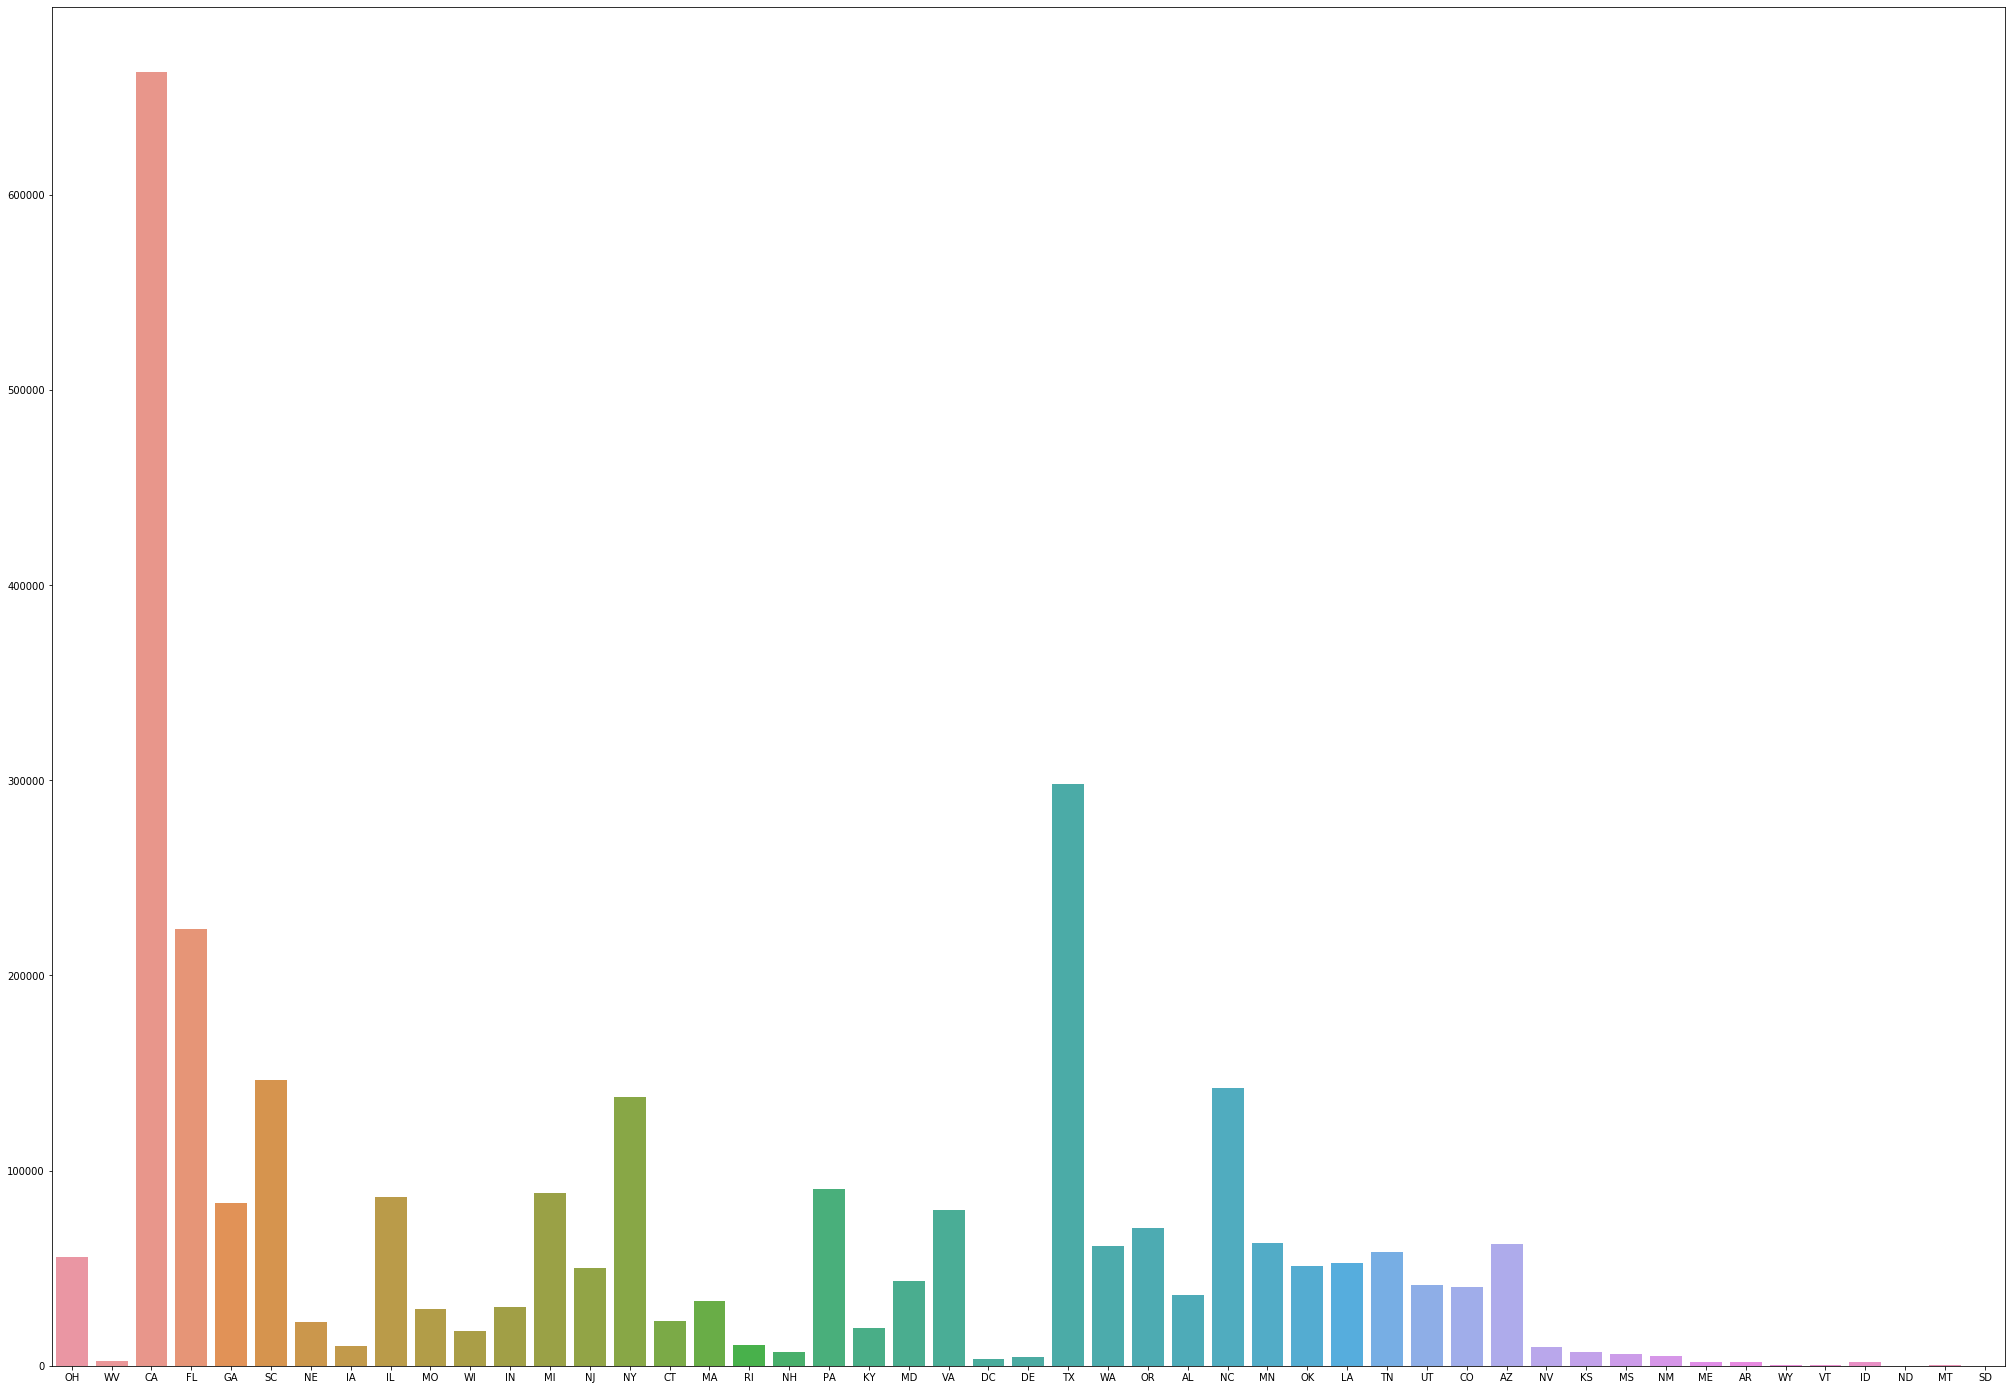

In [12]:
plt.figure(figsize=(35,25))
sns.barplot(states, cnt_by_states)
plt.show()

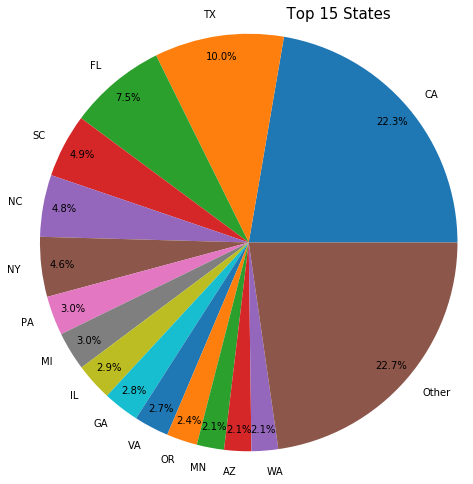

In [13]:
fig = plt.figure(figsize=[18, 8])
count=data['State'].value_counts()
groups=list(data['State'].value_counts().index)[:15]
plt.title('                                      Top 15 States',fontsize=15)
cnts=list(count[:15])
cnts.append(count.agg(sum)-count[:15].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":cnts})
plt.pie(cnts,labels=groups,autopct='%1.1f%%', pctdistance=0.9, radius=1.2)
plt.show()

Correlation

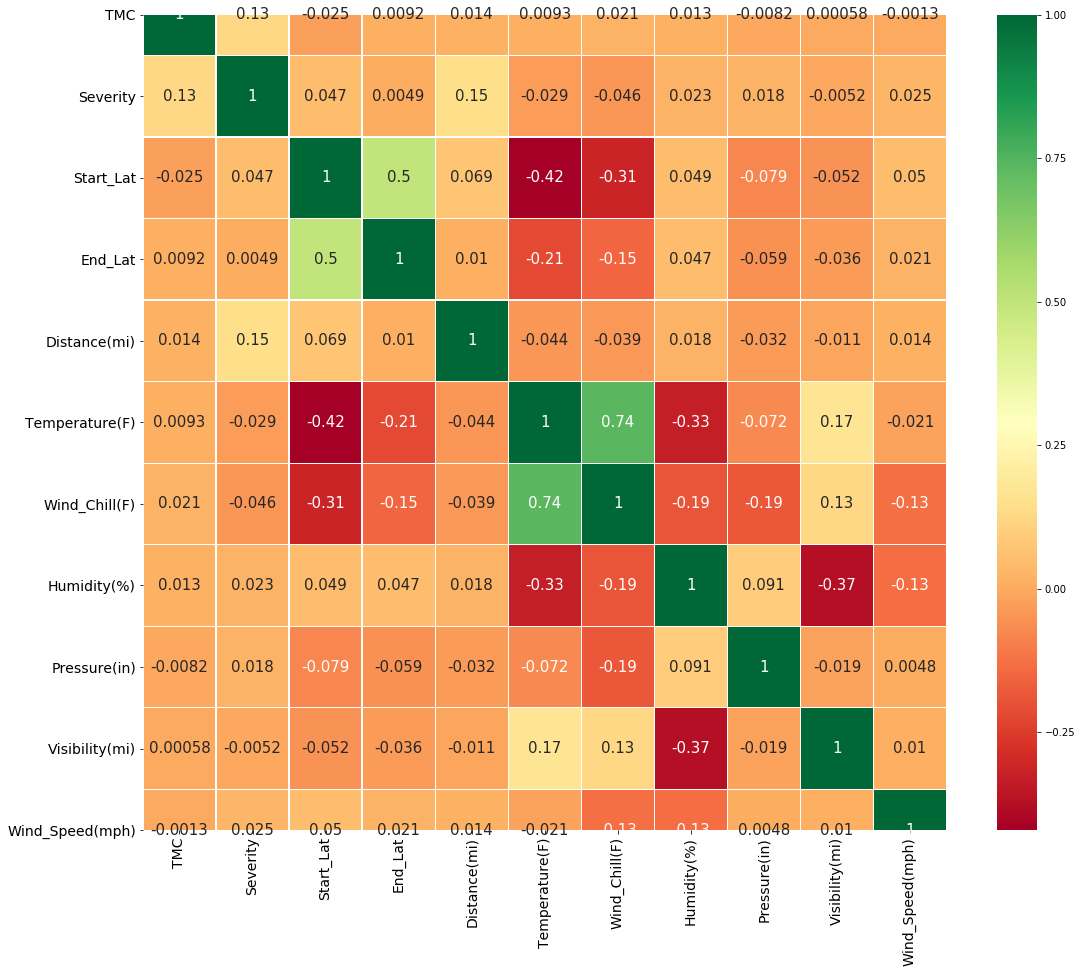

In [14]:
fig=sns.heatmap(data[['TMC','Severity','Start_Lat','End_Lat','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text yticklabel objects>)

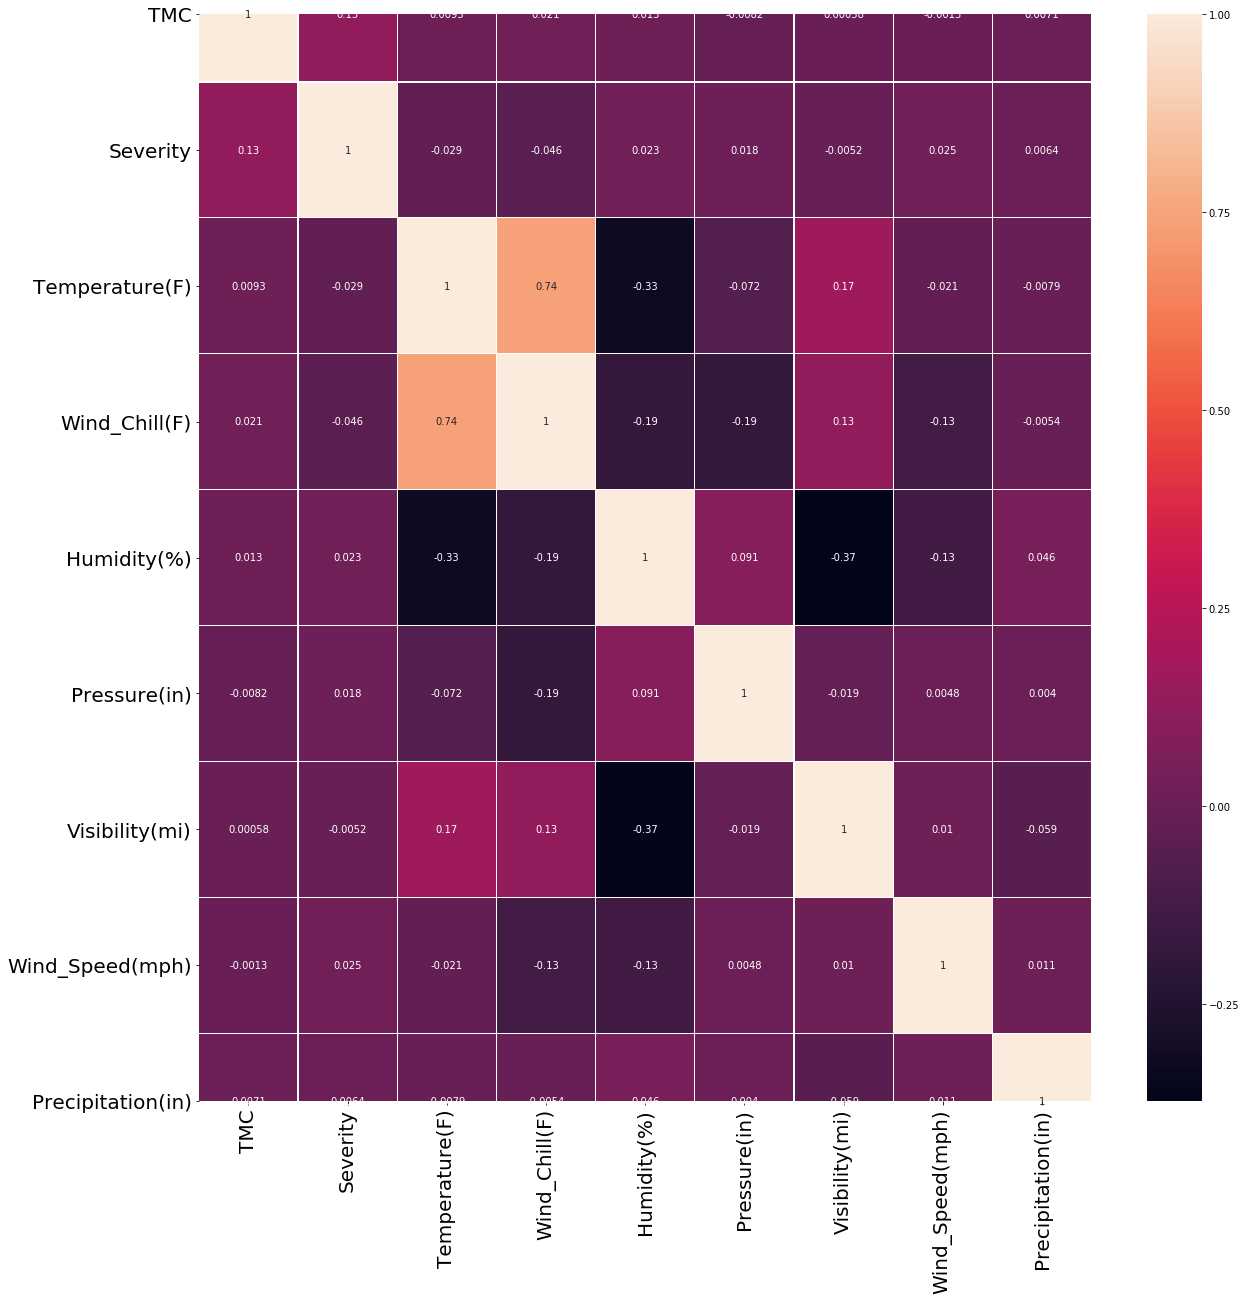

In [15]:
fig = sns.heatmap(data[['TMC','Severity','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']].corr(), annot=True, linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

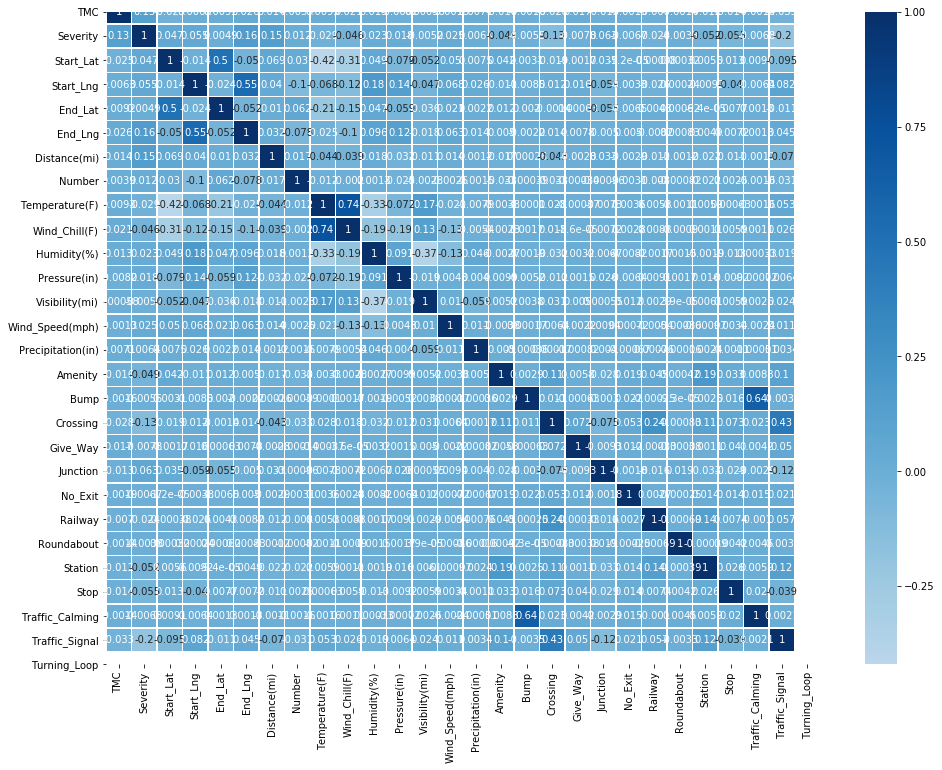

In [16]:
sns.set_palette('deep')
plt.figure(figsize = (16,12))
sns.heatmap(data.corr(),cmap = 'Blues',annot = True,center = 0,linewidths=.5)

severity

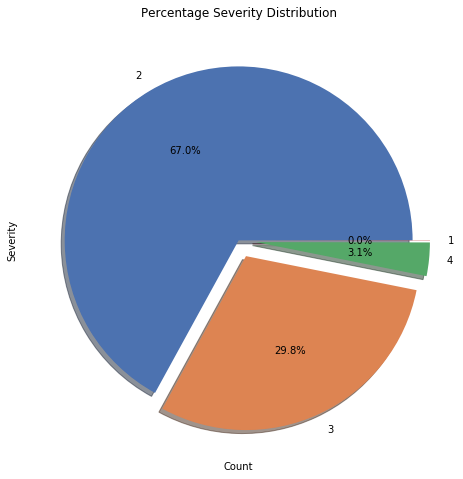

In [17]:
fig = plt.figure(figsize=[18, 8])
data['Severity'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Percentage Severity Distribution')
plt.xlabel('Count')
plt.show()


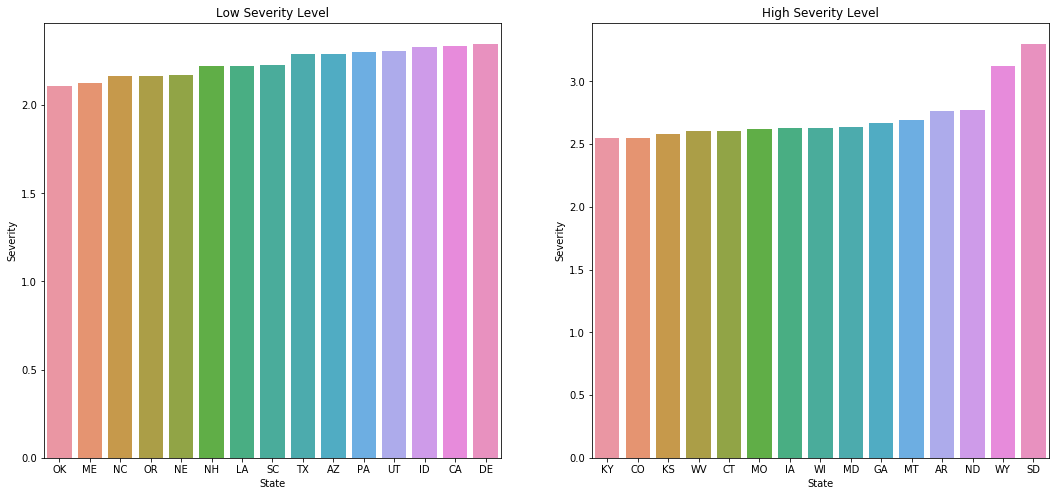

In [18]:
f,axs=plt.subplots(1,2,figsize=(18,8))
tSeverity_States = data.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity').reset_index()
axs[0].set_title('Low Severity Level')
axs[1].set_title('High Severity Level')
sns.barplot(y="Severity", x="State", data=tSeverity_States.head(15),ax=axs[0])
sns.barplot(y="Severity", x="State", data=tSeverity_States.tail(15),ax=axs[1])
plt.show()

C:\Users\rishi\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



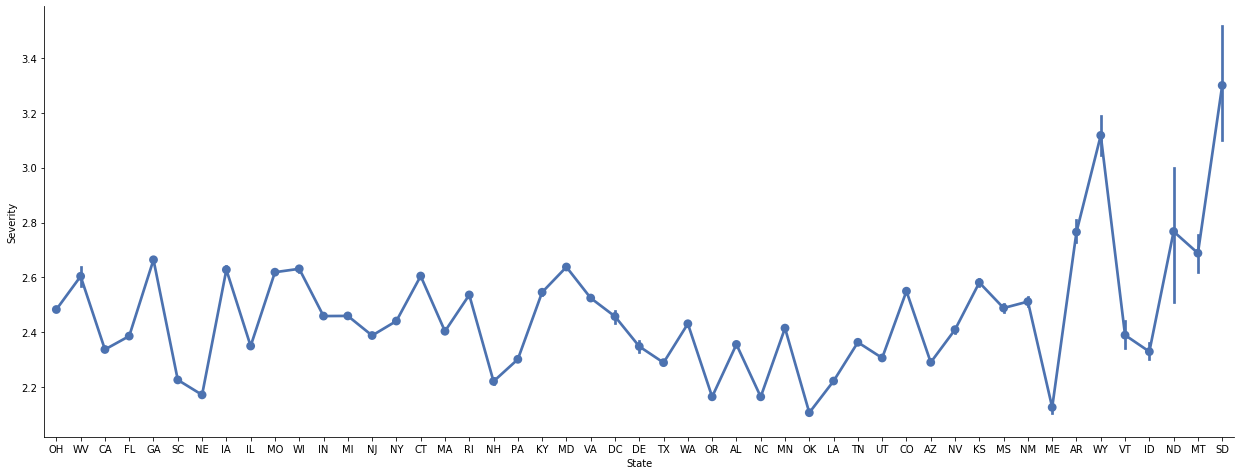

In [19]:
sns.factorplot('State','Severity',data=data)
fig=plt.gcf()
fig.set_size_inches(20,7)
plt.show()

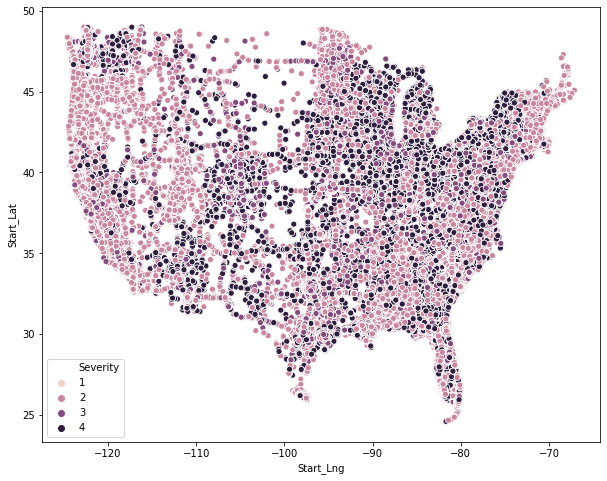

In [20]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Start_Lng', y='Start_Lat', hue='Severity', data=data)

Severity with respect to State

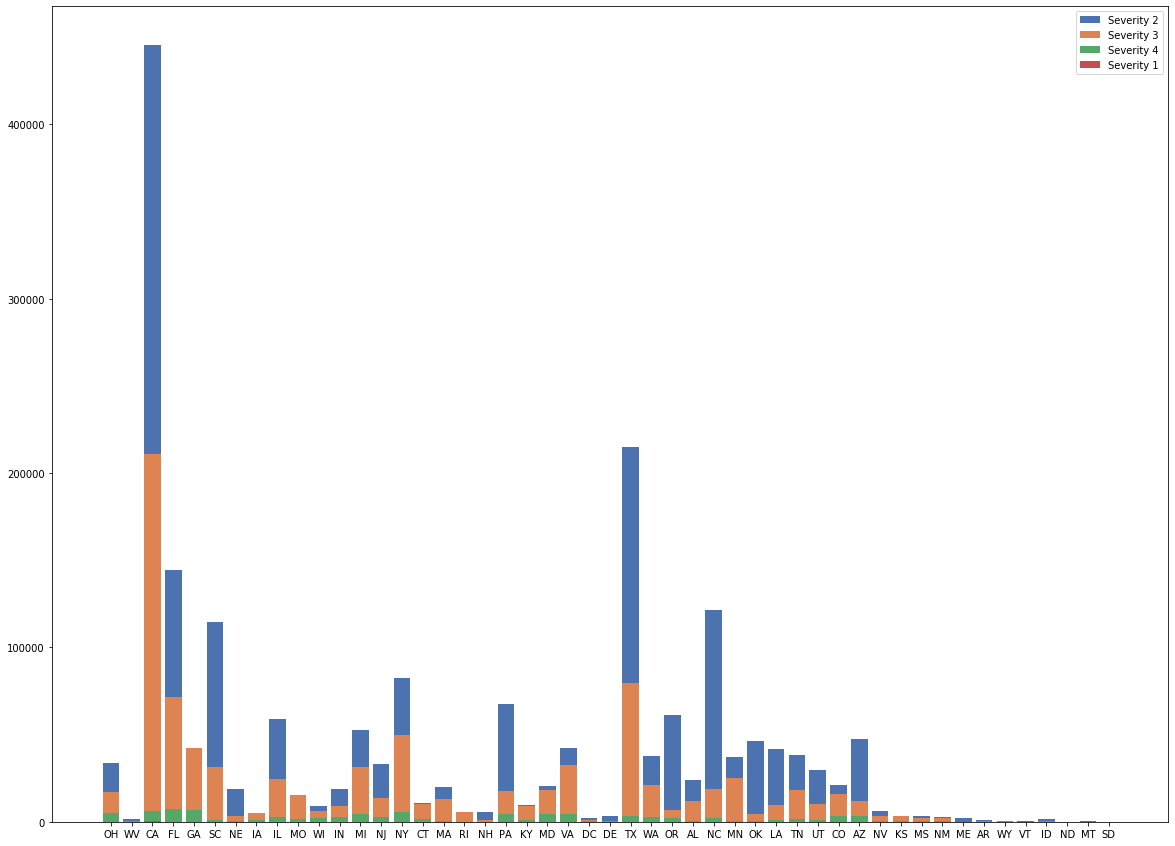

In [21]:
severity_1_by_state = []
severity_2_by_state = []
severity_3_by_state = []
severity_4_by_state = []
for i in states:
    severity_1_by_state.append(data[(data['Severity']==1)&(data['State']==i)].count()['ID'])
    severity_2_by_state.append(data[(data['Severity']==2)&(data['State']==i)].count()['ID'])
    severity_3_by_state.append(data[(data['Severity']==3)&(data['State']==i)].count()['ID'])
    severity_4_by_state.append(data[(data['Severity']==4)&(data['State']==i)].count()['ID'])
plt.figure(figsize=(20,15))
plt.bar(states, severity_2_by_state, label='Severity 2')
plt.bar(states, severity_3_by_state, label='Severity 3')
plt.bar(states, severity_4_by_state, label='Severity 4')
plt.bar(states, severity_1_by_state, label='Severity 1')
plt.legend()

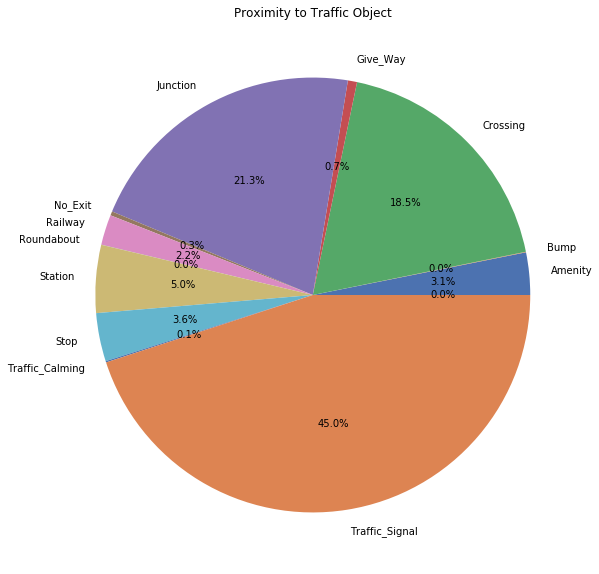

In [22]:
bool_cols = [col for col in data.columns if data[col].dtype ==np.dtype('bool')]
booldf = data[bool_cols]
booldf
bools = booldf.sum(axis=0)
bools.plot.pie(autopct='%1.1f%%',figsize=(15,10))
plt.ylabel('')
plt.title('Proximity to Traffic Object');

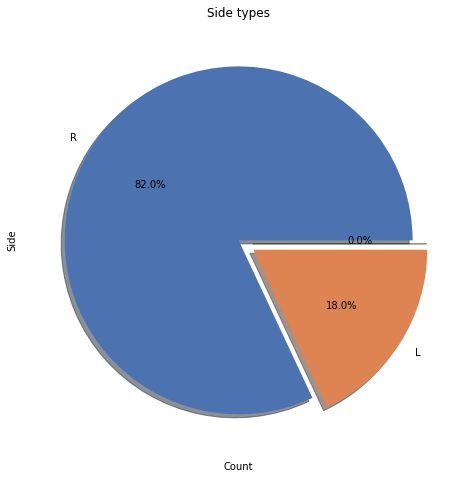

In [23]:
fig = plt.figure(figsize=[18, 8])
data['Side'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Side types')
plt.xlabel('Count')
plt.show()


Key Word Detection From attribute Description

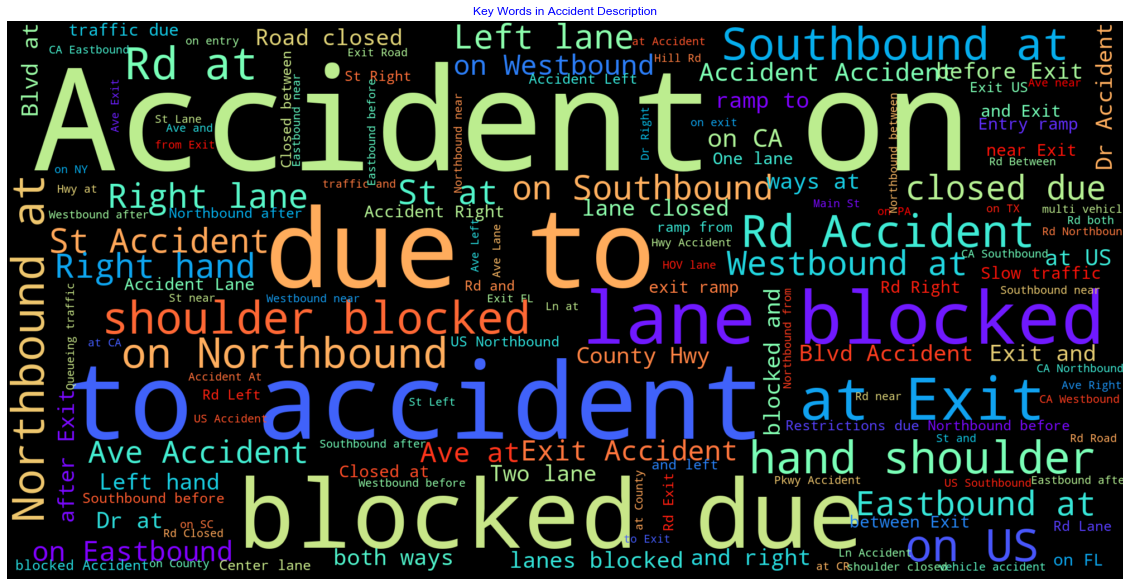

In [24]:
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds1 = data["Description"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="black").generate(" ".join(wrds1))
plt.figure(figsize=(20,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Accident Description",color='b')
plt.show()

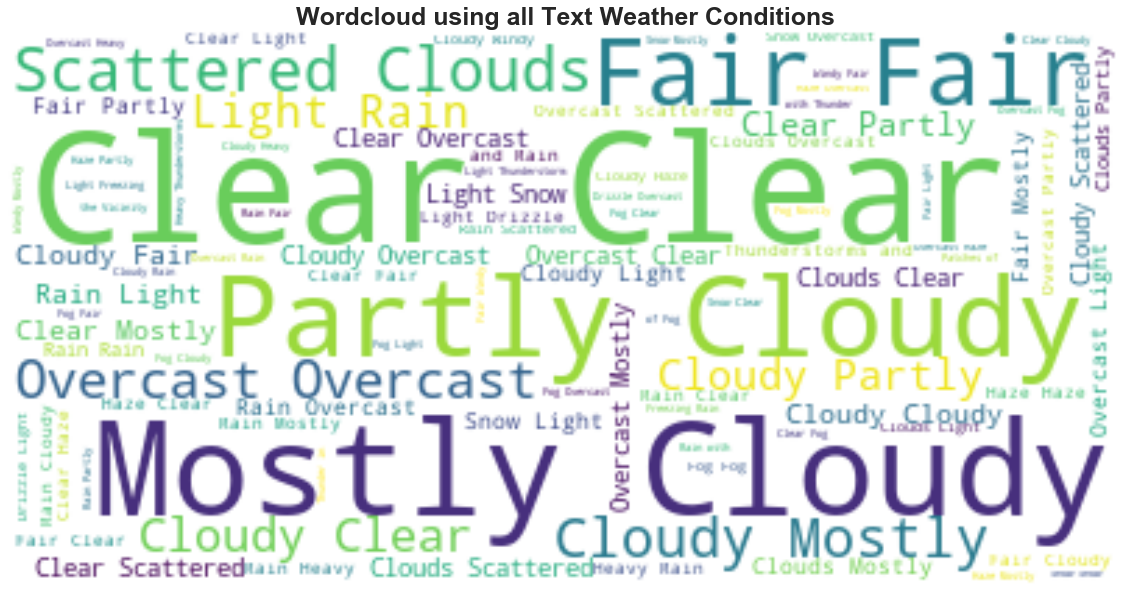

In [25]:
weatherdata = data['Weather_Condition'].dropna()
text = ' '.join(weatherdata.values.tolist())
wordcloud = WordCloud(background_color="white").generate(text)
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.set_title('Wordcloud using all Text Weather Conditions',fontdict={'fontsize': 25, 'fontweight' : 'bold', 'verticalalignment': 'center', 'horizontalalignment': 'center'})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

fig.savefig('WordCloudAllText.png')


In [26]:
boolean_type=[]
for column in data.columns:
    if data[column].dtype=='bool':
        boolean_type.append(column)
def creating_groups(col):
    data_new = data.groupby([col,'Severity'])['ID'].count()
    data_new = data_new.unstack('Severity')
    data_new = data_new.fillna(0)
    return data_new
for columns in boolean_type:
    print(creating_groups(columns))

Severity    1        2       3      4
Amenity                              
False     949  1961486  885196  91484
True       19    31924    2424    853
Severity      1          2         3        4
Bump                                         
False     968.0  1993007.0  887573.0  92333.0
True        0.0      403.0      47.0      4.0
Severity    1        2       3      4
Crossing                             
False     881  1804143  873058  88663
True       87   189267   14562   3674
Severity    1        2       3      4
Give_Way                             
False     967  1987590  886117  92034
True        1     5820    1503    303
Severity    1        2       3      4
Junction                             
False     955  1858206  794803  81924
True       13   135204   92817  10413
Severity    1        2       3      4
No_Exit                              
False     965  1990787  886943  92245
True        3     2623     677     92
Severity    1        2       3      4
Railway           

<Figure size 576x396 with 0 Axes>

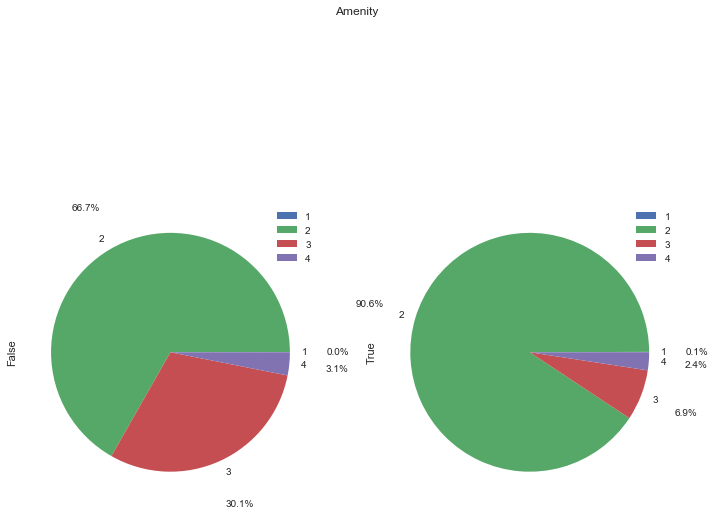

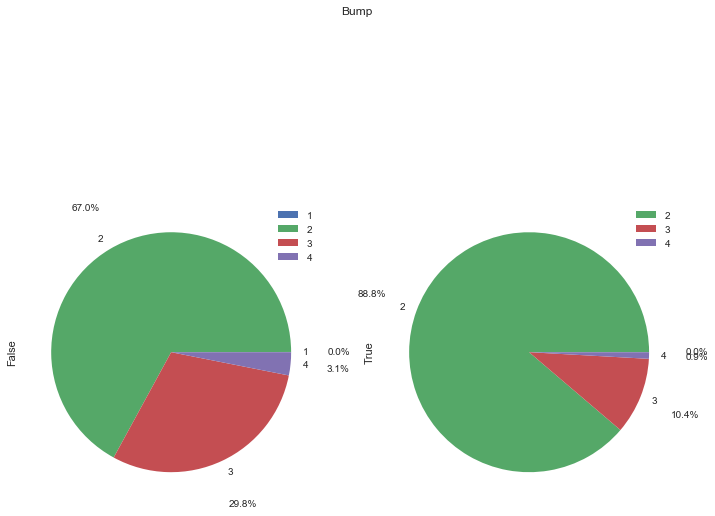

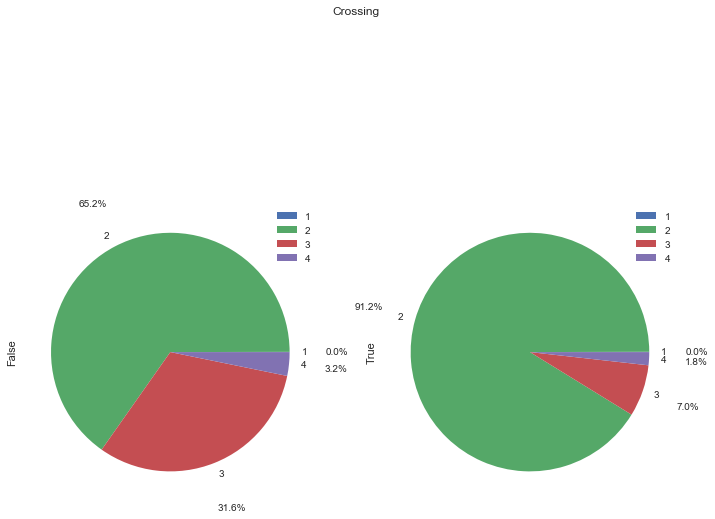

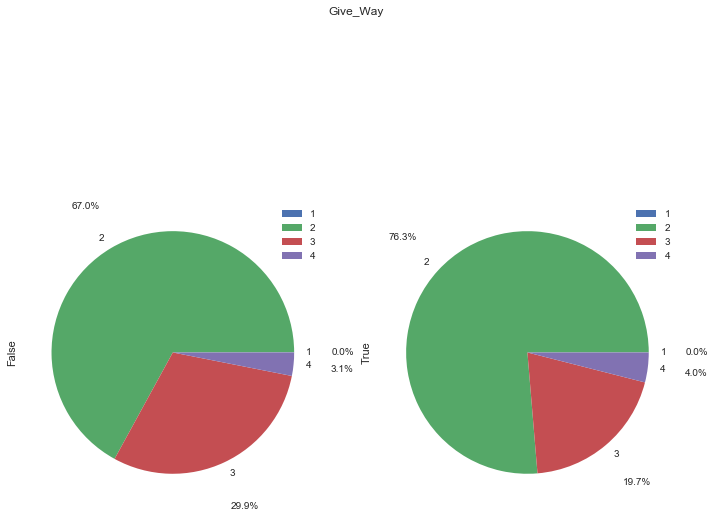

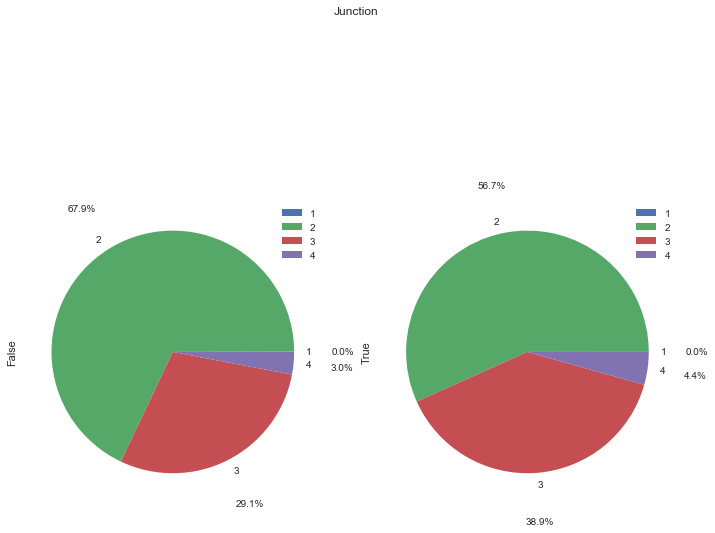

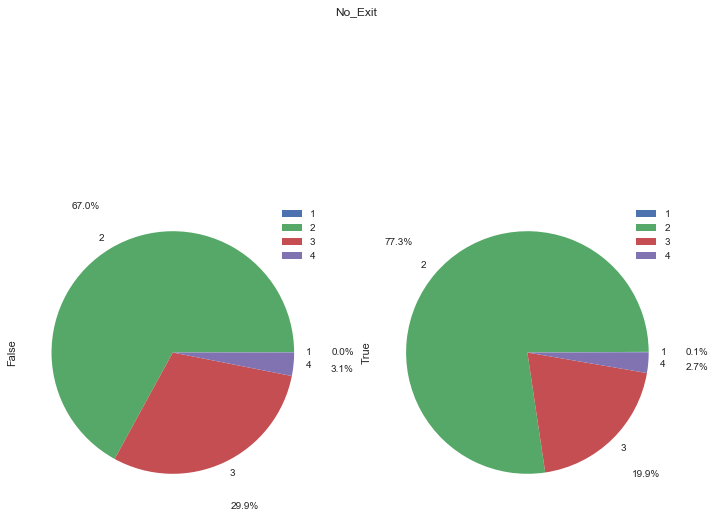

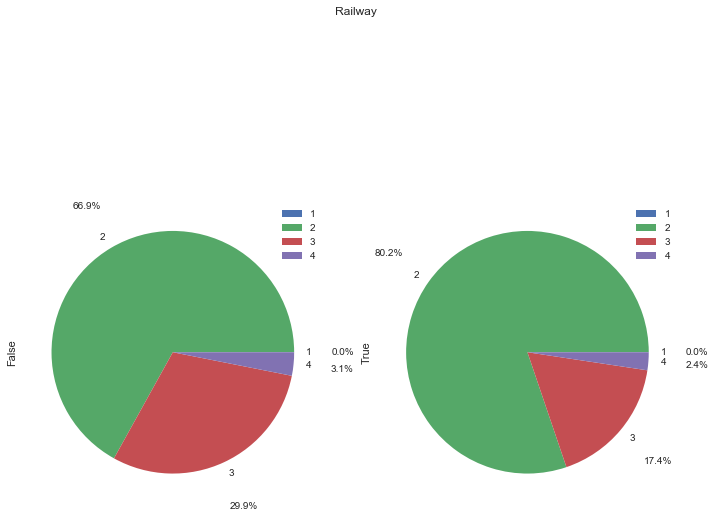

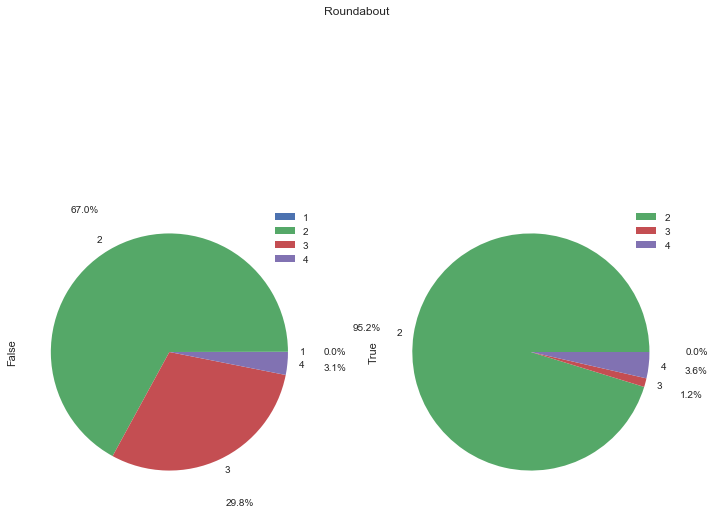

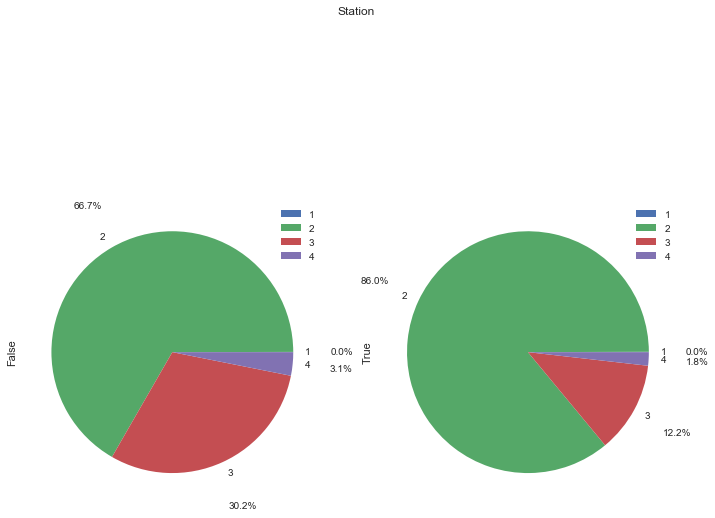

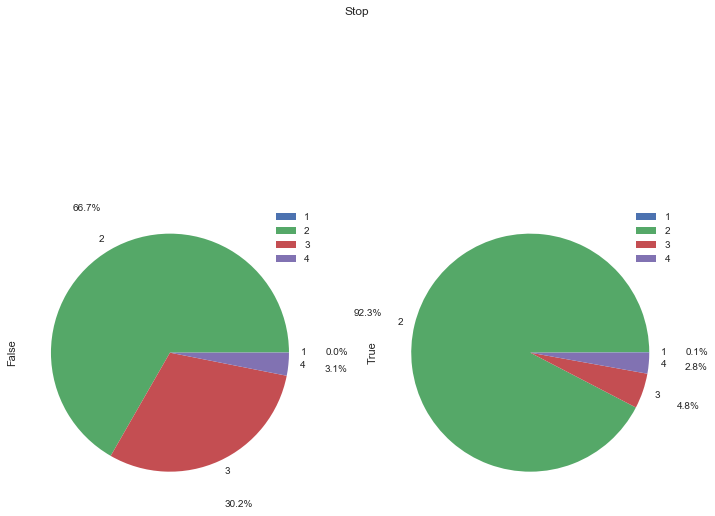

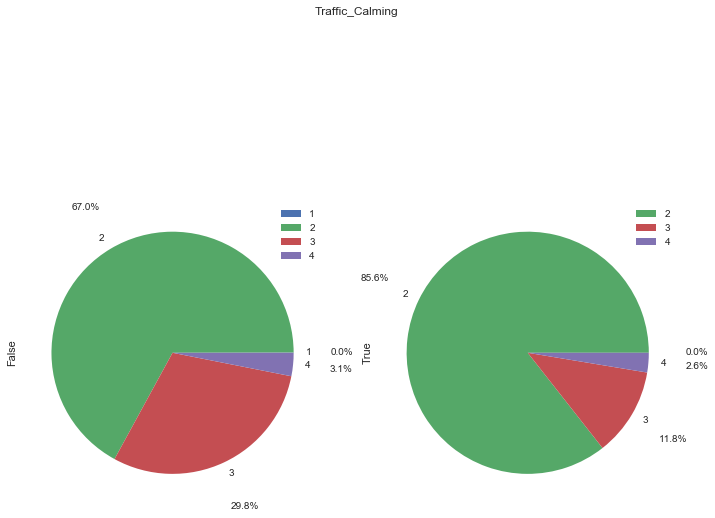

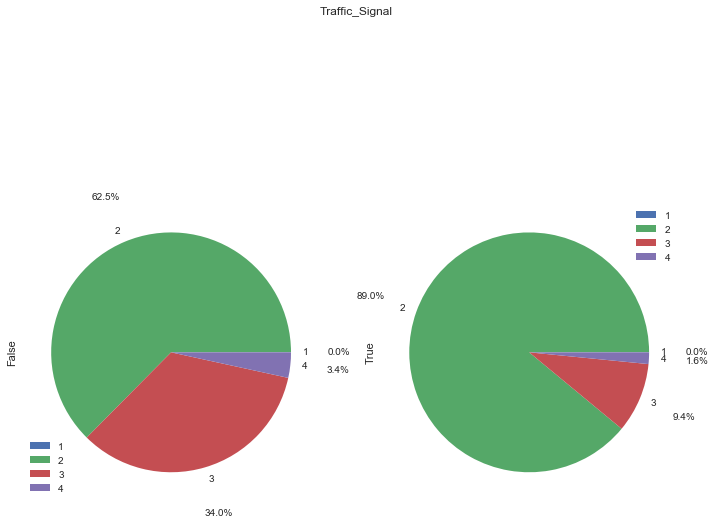

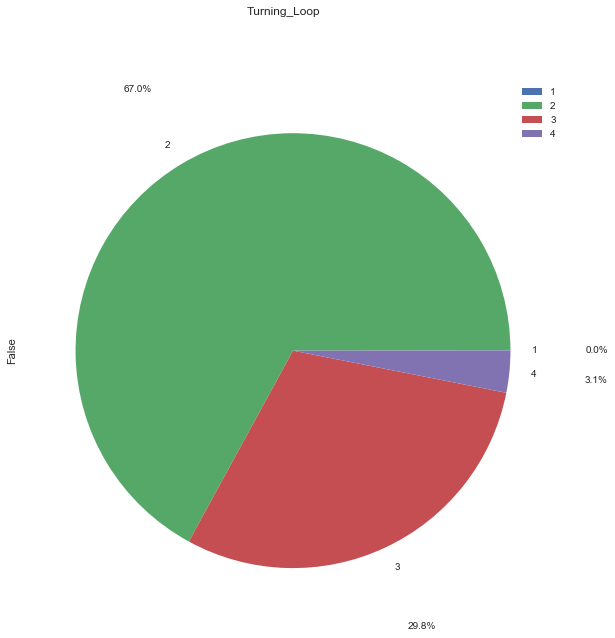

In [27]:
df_list=[]
def  bool_severity(col):
    df_bool = data.groupby([col,'Severity'])['ID'].count()
    df_bool = df_bool.unstack(col)
    df_list.append(df_bool)
for col in boolean_type:
    bool_severity(col)
for i in range(len(boolean_type)):
    plt.tight_layout()
    df_list[i].plot(kind='pie',subplots=True,autopct='%.1f%%',pctdistance=1.4,figsize=(10,10),title = boolean_type[i])

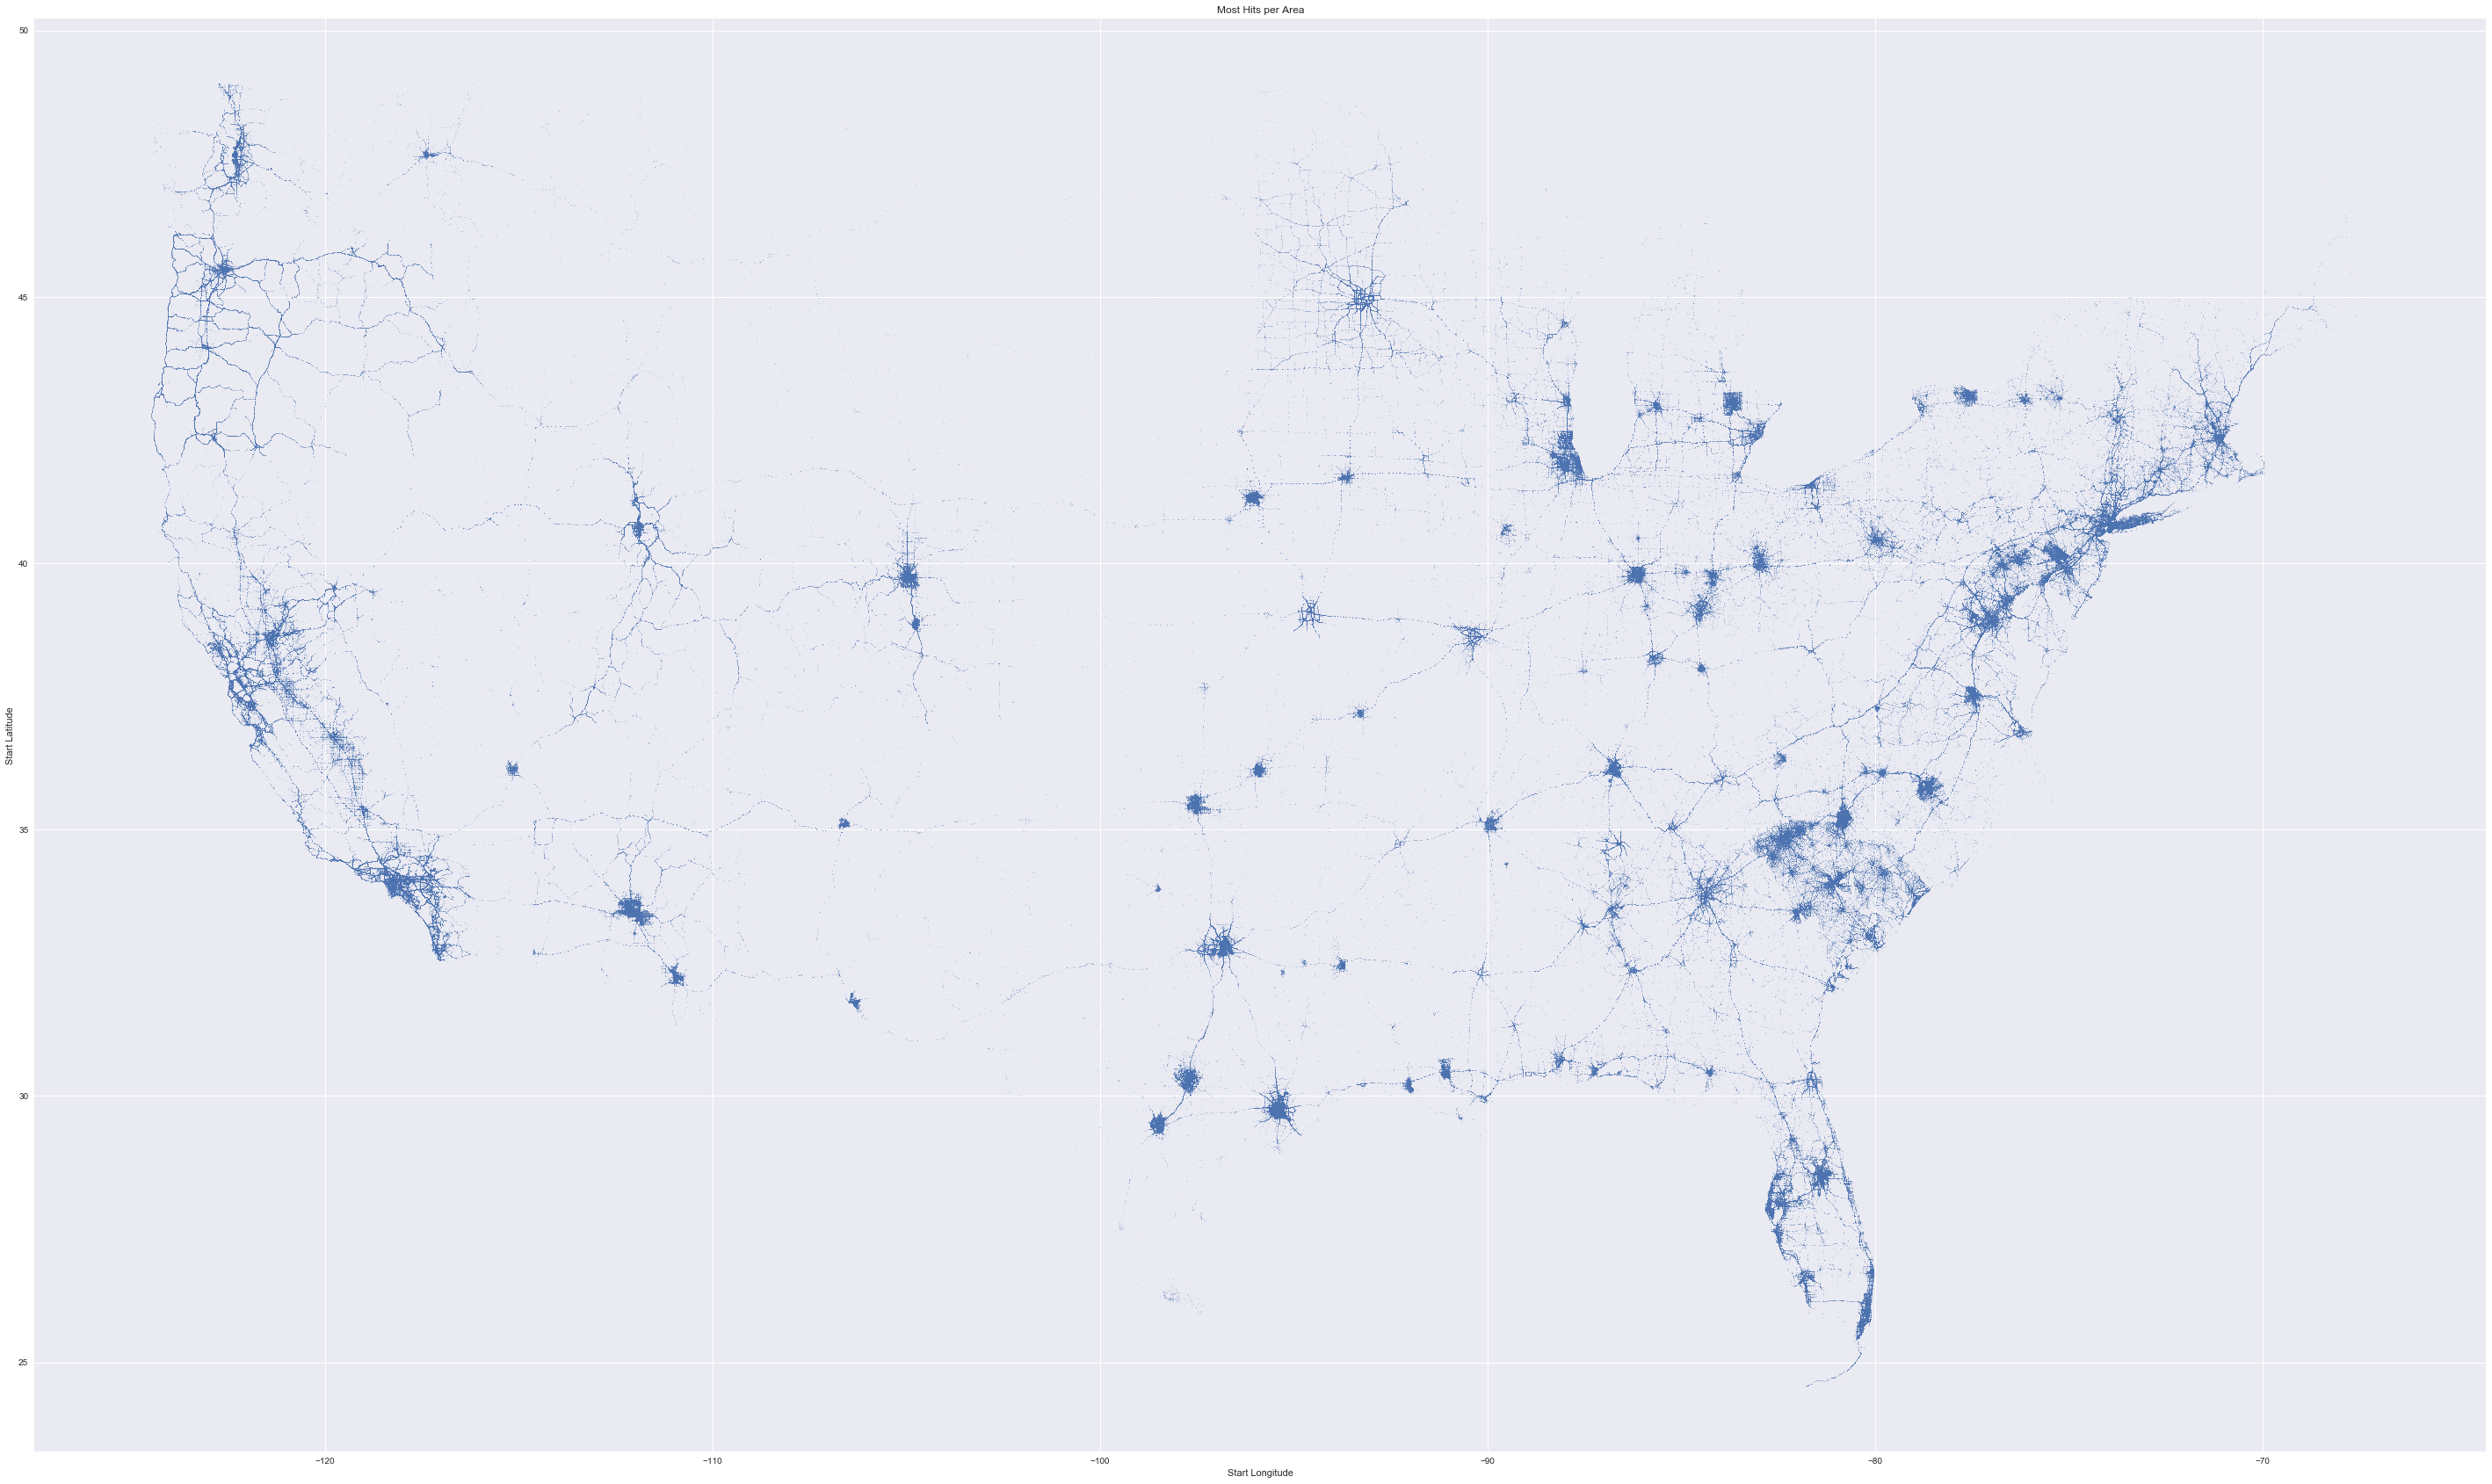

In [28]:
#plotting the Lat against Long could show the map of the area
plt.figure(figsize=(50,30))
plt.title('Most Hits per Area')
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.plot(data.Start_Lng, data.Start_Lat, ".", alpha=0.5, ms=1)
plt.show()

Text(0, 0.5, 'Visibility(mi)')

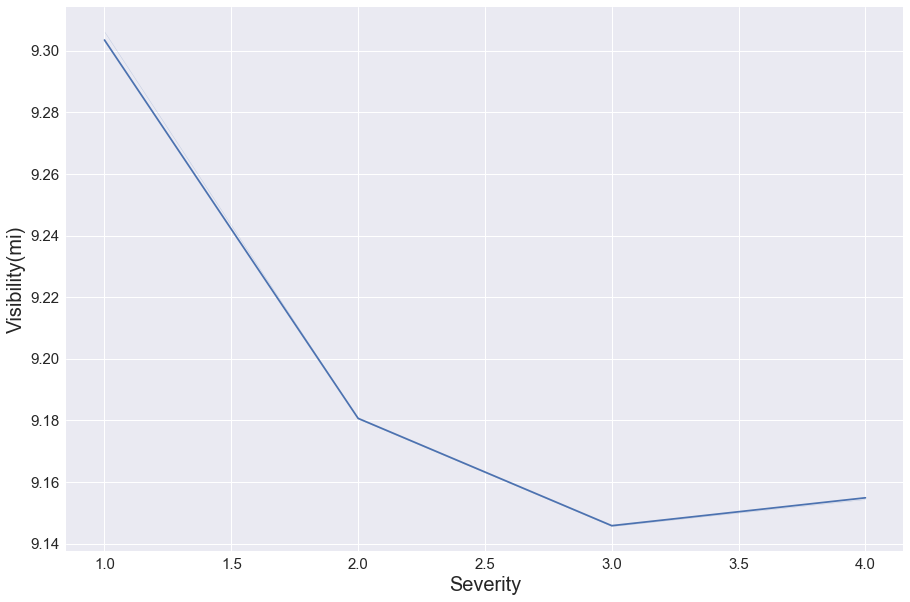

In [29]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Severity", y="Visibility(mi)", ci=False, data=data)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Severity", fontsize=20)
plt.ylabel("Visibility(mi)", fontsize=20)

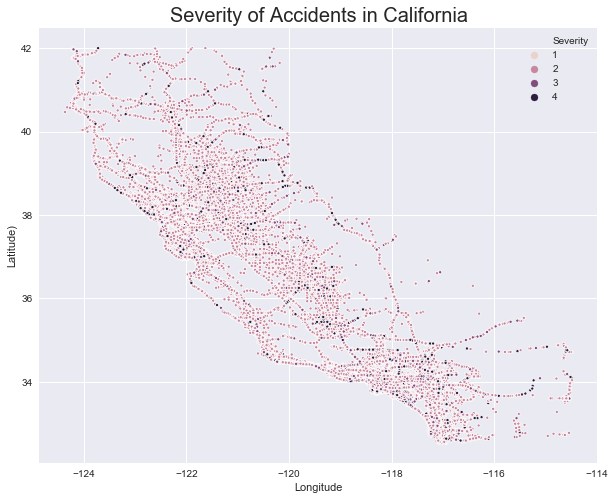

In [30]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Start_Lng', y='Start_Lat',hue='Severity', data=data.loc[data.State=='CA'], s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.title('Severity of Accidents in California', fontsize=20)
plt.show()

In [31]:
data_Severity = data[(data['Severity']==4)]

In [32]:
import folium
m = folium.Map(location=[data_Severity.Start_Lat.mean(),data_Severity.Start_Lng.mean()], zoom_start=4,tiles="CartoDB dark_matter")
data_Severity.apply(lambda row:folium.CircleMarker(location=[row["Start_Lat"], row["Start_Lng"]],radius=1).add_to(m), axis=1)
m.save('./map.html')

In [33]:
from IPython.display import FileLink
print("The following is a map of 10000 accidents")
FileLink(r'map.html')

The following is a map of 10000 accidents


C:\Users\rishi\Desktop\ProjectML\map.html

In [34]:
df_st_ct = pd.value_counts(data['State'])

fig = go.Figure(data=go.Choropleth(
    locations=df_st_ct.index,
    z = df_st_ct.values.astype(float),  # Data to be color-coded
    locationmode = 'USA-states',     # set of locations match entries in `locations`
    colorscale = 'YlOrRd',
    colorbar_title = "Count",
))

fig.update_layout(
    title_text = 'US Accidents by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [35]:
data.dropna(subset=data.columns[data.isnull().mean()!=0], how='any', axis=0, inplace=True)
data.shape

(2974335, 49)

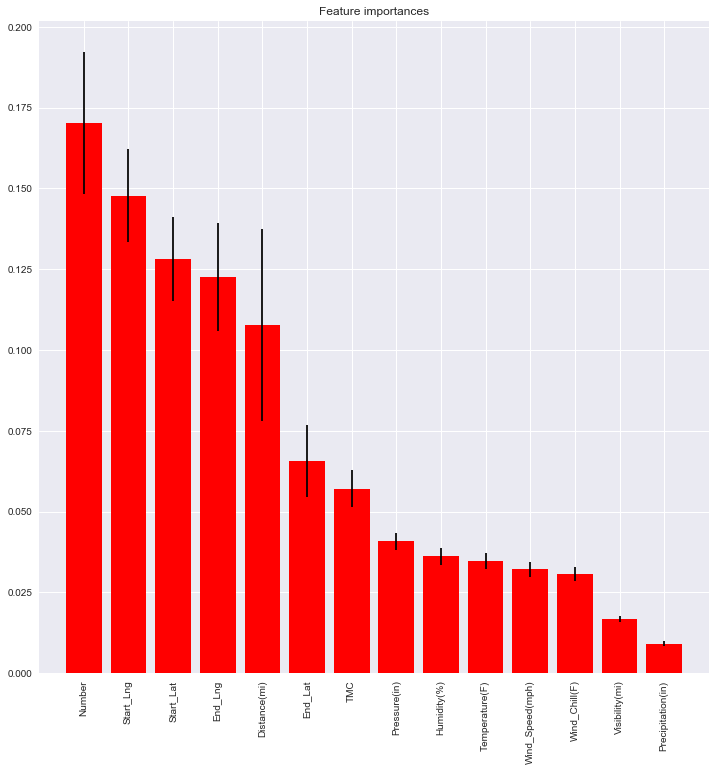

In [36]:
train_y = data['Severity'].values
x_cols = [col for col in data.columns if col not in ['Severity'] if data[col].dtype=='float64']
train_col= data[x_cols]

fearture_name = train_col.columns.values 

from sklearn import ensemble 

model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_col,train_y)

#plot imp 
importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), fearture_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()